# Tech Challenge FIAP - Etapa 3: Pré-Processamento

In [16]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

base_dados = kagglehub.dataset_download("awaiskaggler/insurance-csv")
print("Path to dataset files:", base_dados)

df = pd.read_csv(f"{base_dados}/insurance.csv")
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Path to dataset files: C:\Users\prado\.cache\kagglehub\datasets\awaiskaggler\insurance-csv\versions\1
Dataset shape: (1338, 7)

First few rows:


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Pré-processamento de Dados - Tech Challenge FIAP

## 1. Tratamento de Registros Duplicados

In [18]:
# 1. TRATAMENTO DE REGISTROS DUPLICADOS

print("Dados antes da remoção de duplicatas:")
print(f"Shape original: {df.shape}")
print(f"Registros duplicados encontrados: {df.duplicated().sum()}")

duplicados = df[df.duplicated()]
if len(duplicados) > 0:
    print("\nRegistros duplicados:")
    print(duplicados)

# Aqui, remove-se os duplicados mas se mantém o primeiro registro usando drop_duplicates()
df_clean = df.drop_duplicates()
print(f"\nShape após remoção de duplicatas: {df_clean.shape}")
print(f"Registros removidos: {df.shape[0] - df_clean.shape[0]}")

Dados antes da remoção de duplicatas:
Shape original: (1338, 7)
Registros duplicados encontrados: 1

Registros duplicados:
     age   sex   bmi  children smoker     region  expenses
581   19  male  30.6         0     no  northwest   1639.56

Shape após remoção de duplicatas: (1337, 7)
Registros removidos: 1


## 2. Transformação da Variável Target (expenses)

C:\Users\prado\AppData\Local\Temp\ipykernel_8296\380055480.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_expenses'] = np.log1p(df_clean['expenses'])


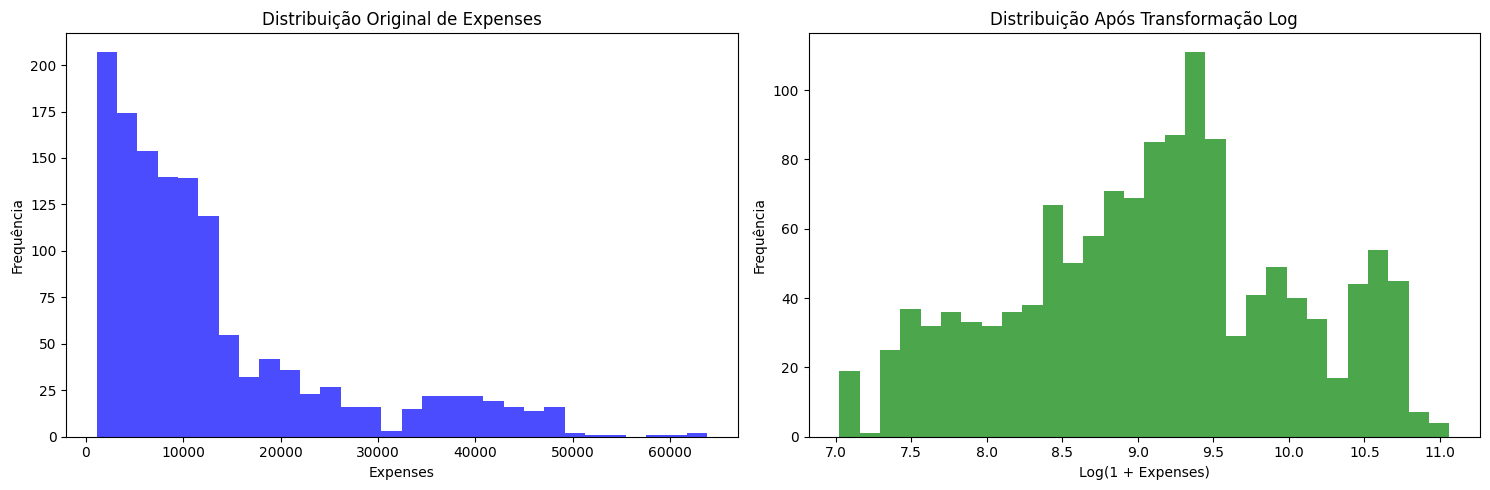

Estatísticas da variável original:
count     1337.000000
mean     13279.121638
std      12110.359657
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: expenses, dtype: float64

Estatísticas da variável transformada:
count    1337.000000
mean        9.100097
std         0.918551
min         7.023643
25%         8.465340
50%         9.147098
75%         9.720689
max        11.063061
Name: log_expenses, dtype: float64


In [19]:
# 2. TRANSFORMAÇÃO DA VARIÁVEL TARGET

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Exibir distribuição original
axes[0].hist(df_clean['expenses'], bins=30, alpha=0.7, color='blue')
axes[0].set_title('Distribuição Original de Expenses')
axes[0].set_xlabel('Expenses')
axes[0].set_ylabel('Frequência')

df_clean['log_expenses'] = np.log1p(df_clean['expenses'])

# Exibir distribuição após transformação
axes[1].hist(df_clean['log_expenses'], bins=30, alpha=0.7, color='green')
axes[1].set_title('Distribuição Após Transformação Log')
axes[1].set_xlabel('Log(1 + Expenses)')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

print("Estatísticas da variável original:")
print(df_clean['expenses'].describe())
print("\nEstatísticas da variável transformada:")
print(df_clean['log_expenses'].describe())

## 3. Encoding de Variáveis Categóricas
**Estratégias de Encoding:**
- **Label Encoding** para `smoker` (binária: yes/no)
- **One-Hot Encoding** para `sex` e `region` (nominais sem ordem)

In [20]:
# 3. ENCODING DE VARIÁVEIS CATEGÓRICAS

df_encoded = df_clean.copy()

print("Valores únicos nas variáveis categóricas:")
print("Sex:", df_encoded['sex'].unique())
print("Smoker:", df_encoded['smoker'].unique())
print("Region:", df_encoded['region'].unique())

label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
print(f"\nMapeamento smoker: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

df_encoded['sex_male'] = (df_encoded['sex'] == 'male').astype(int)

region_dummies = pd.get_dummies(df_encoded['region'], prefix='region')
df_encoded = pd.concat([df_encoded, region_dummies], axis=1)

print("\nNovas colunas criadas:")
print("Sex encoding:", ['sex_male'])
print("Region encoding:", list(region_dummies.columns))

print(f"\nShape após encoding: {df_encoded.shape}")
df_encoded[['sex', 'sex_male', 'smoker', 'smoker_encoded', 'region'] + list(region_dummies.columns)].head()

Valores únicos nas variáveis categóricas:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']

Mapeamento smoker: {'no': 0, 'yes': 1}

Novas colunas criadas:
Sex encoding: ['sex_male']
Region encoding: ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

Shape após encoding: (1337, 14)


,sex,sex_male,smoker,smoker_encoded,region,region_northeast,region_northwest,region_southeast,region_southwest
0,female,0,yes,1,southwest,False,False,False,True
1,male,1,no,0,southeast,False,False,True,False
2,male,1,no,0,southeast,False,False,True,False
3,male,1,no,0,northwest,False,True,False,False
4,male,1,no,0,northwest,False,True,False,False


## 4. Feature Engineering
**Lógica das novas features:**
- **age_bmi_interaction**: Interação entre idade e BMI (pessoas mais velhas com BMI alto podem ter custos exponencialmente maiores)
- **age_squared**: Relação quadrática da idade (custos podem crescer exponencialmente com a idade)
- **bmi_category**: Categorização do BMI (underweight, normal, overweight, obese)
- **high_risk**: Avalia se é fumante em idade avançada.

In [21]:
# 4. FEATURE ENGINEERING

df_featured = df_encoded.copy()

# 1. Interação entre idade e BMI (pode capturar relação não-linear)
df_featured['age_bmi_interaction'] = df_featured['age'] * df_featured['bmi']

# 2. Age ao quadrado (captura relação não-linear)
df_featured['age_squared'] = df_featured['age'] ** 2

# 3. Categorização do BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_featured['bmi_category'] = df_featured['bmi'].apply(categorize_bmi)

bmi_dummies = pd.get_dummies(df_featured['bmi_category'], prefix='bmi')
df_featured = pd.concat([df_featured, bmi_dummies], axis=1)

# 4. Feature adicional: high_risk (fumante + idade > 40)
df_featured['high_risk'] = ((df_featured['smoker_encoded'] == 1) & (df_featured['age'] > 40)).astype(int)

print("Novas features criadas:")
print("- age_bmi_interaction: interação entre idade e BMI")
print("- age_squared: idade ao quadrado")
print("- bmi_category + encoding: categorias de BMI")
print("- high_risk: fumante com mais de 40 anos")

print(f"\nShape após feature engineering: {df_featured.shape}")

new_features = ['age_bmi_interaction', 'age_squared', 'high_risk']
correlations = df_featured[new_features + ['expenses']].corr()['expenses'].sort_values(ascending=False)
print("\nCorrelações das novas features com expenses:")
print(correlations[:-1]) 

Novas features criadas:
- age_bmi_interaction: interação entre idade e BMI
- age_squared: idade ao quadrado
- bmi_category + encoding: categorias de BMI
- high_risk: fumante com mais de 40 anos

Shape após feature engineering: (1337, 22)

Correlações das novas features com expenses:
expenses               1.000000
high_risk              0.607287
age_bmi_interaction    0.334306
Name: expenses, dtype: float64


## 5. Preparação do Dataset Final

Criando o dataset final preparado para modelagem com apenas as features processadas.

In [22]:
# 6. DATASET FINAL PREPARADO

# Selecionando apenas features numéricas e categóricas encodadas
features_for_modeling = (
    numerical_features +  # Features numéricas escalonadas
    ['smoker_encoded', 'sex_male', 'high_risk'] +  # Features categóricas encodadas
    [col for col in df_final.columns if col.startswith('region_')] +  # Regions
    [col for col in df_final.columns if col.startswith('bmi_') and col != 'bmi_category']  # BMI categories (apenas dummies)
)

X = df_final[features_for_modeling]
y_original = df_final['expenses']
y_transformed = df_final['log_expenses']

print("Dataset Final para Modelagem:")
print(f"Shape das features (X): {X.shape}")
print(f"Features selecionadas: {len(features_for_modeling)}")
print("\nLista de features:")
for i, feature in enumerate(features_for_modeling, 1):
    print(f"{i:2d}. {feature}")

print(f"\nTarget original (y): {y_original.shape}")
print(f"Target transformado (y_log): {y_transformed.shape}")

print("\nTipos de dados das features:")
print(X.dtypes.value_counts())

print("\nVerificação - Features categóricas restantes (devem ser apenas encoded):")
categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    print(f"ATENÇÃO: Features categóricas não encodadas encontradas: {list(categorical_features)}")
else:
    print("✓ Todas as features estão numericamente encodadas")

df_final_clean = df_final.drop(columns=['sex', 'smoker', 'region', 'bmi_category'])

print(f"\nDataset limpo criado:")
print(f"Colunas removidas: {df_final.shape[1] - df_final_clean.shape[1]}")

df_final_clean.to_csv(f"{base_dados}/insurance_preprocessed.csv", index=False)
print(f"\nDados processados salvos em: {base_dados}/insurance_preprocessed.csv")

Dataset Final para Modelagem:
Shape das features (X): (1337, 16)
Features selecionadas: 16

Lista de features:
 1. age
 2. bmi
 3. children
 4. age_bmi_interaction
 5. age_squared
 6. smoker_encoded
 7. sex_male
 8. high_risk
 9. region_northeast
10. region_northwest
11. region_southeast
12. region_southwest
13. bmi_normal
14. bmi_obese
15. bmi_overweight
16. bmi_underweight

Target original (y): (1337,)
Target transformado (y_log): (1337,)

Tipos de dados das features:
bool       8
float64    5
int32      3
Name: count, dtype: int64

Verificação - Features categóricas restantes (devem ser apenas encoded):
✓ Todas as features estão numericamente encodadas

Dataset limpo criado:
Colunas removidas: 4

Dados processados salvos em: C:\Users\prado\.cache\kagglehub\datasets\awaiskaggler\insurance-csv\versions\1/insurance_preprocessed.csv
